# OKCupid Data
En este cuaderno de trabajo se usará los datos de las respuestas proporcionadas por los usuarios de la aplicación OKCupid

In [1]:
#bibliotecas externas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
datos = pd.read_csv("profiles.csv")
datos.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


### Exploración preliminar de los datos:

In [3]:
datos.describe(include="all")

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
datos.sign = datos.sign.str.extract(r"(gemini|cancer|pisces|aquarius|taurus|virgo|sagittarius|leo|aries|libra|capricorn|scorpio)")

In [5]:
columnas_ens = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
for column in columnas_ens:
    datos[column] = datos[column].str.replace("<br />\n"," ")
for column in columnas_ens:
    datos[column] = datos[column].str.replace("\n"," ")
datos["essay"] = datos["essay0"].str.cat([datos["essay1"],datos["essay2"],datos["essay3"],datos["essay4"],
                                          datos["essay5"],datos["essay6"],datos["essay7"],datos["essay8"],datos["essay9"]],
                                         sep=" ", na_rep = "")
datos["essay"] = datos["essay"].str.upper()

In [6]:
datos = datos.dropna(subset=["essay","sign"])

***

In [7]:
#customización de los gráficos:
ciclo_color = (cycler(color=sns.color_palette("magma")))
plt.rc('axes', prop_cycle=ciclo_color)
plt.rc('font',family="Times New Roman")
plt.rc('font',size=15)

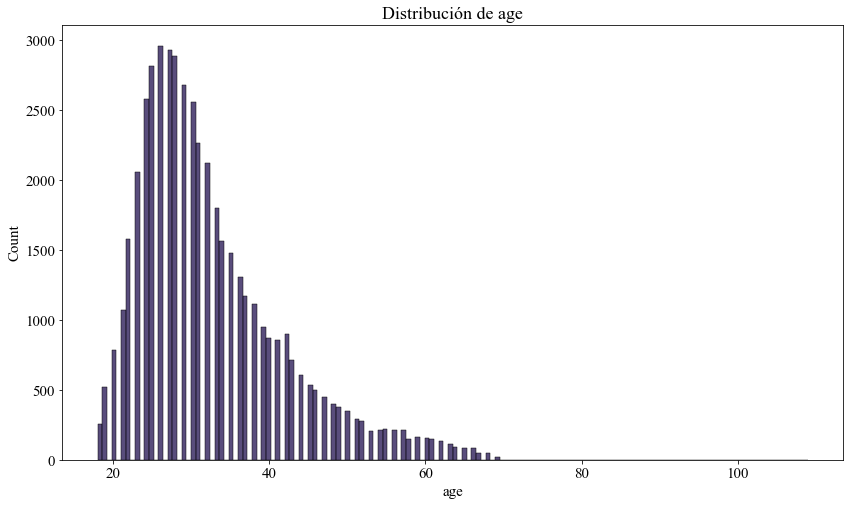

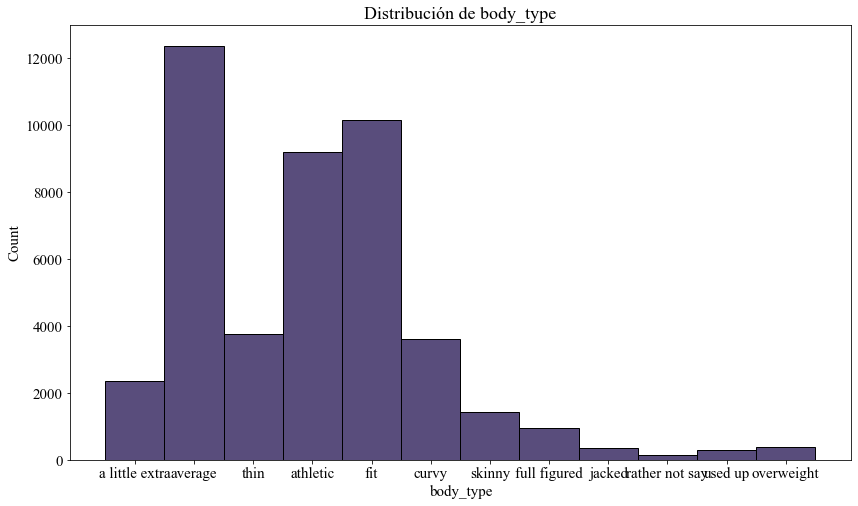

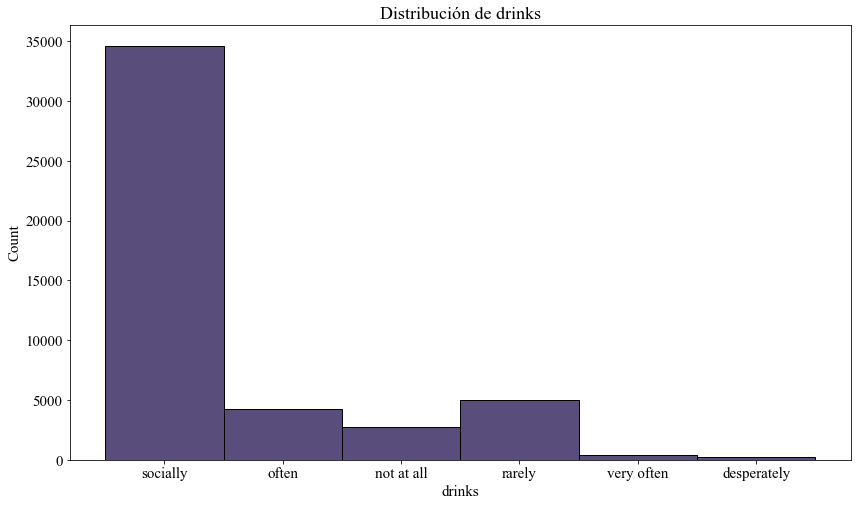

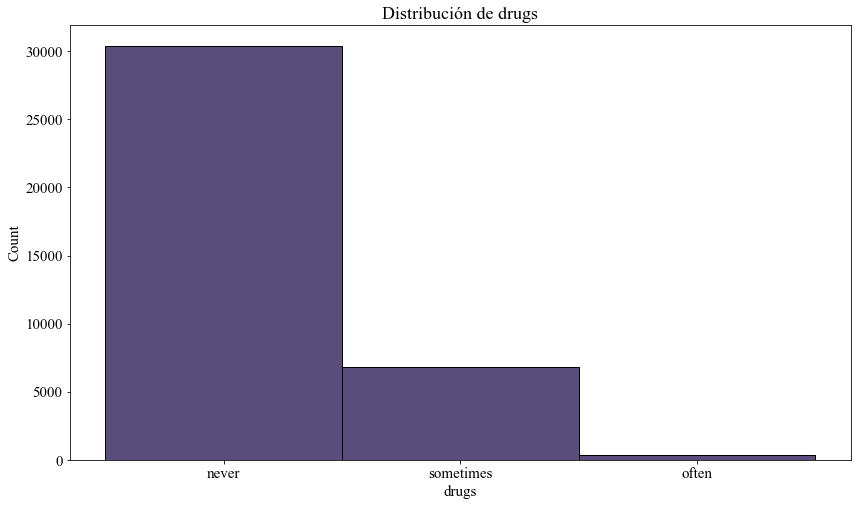

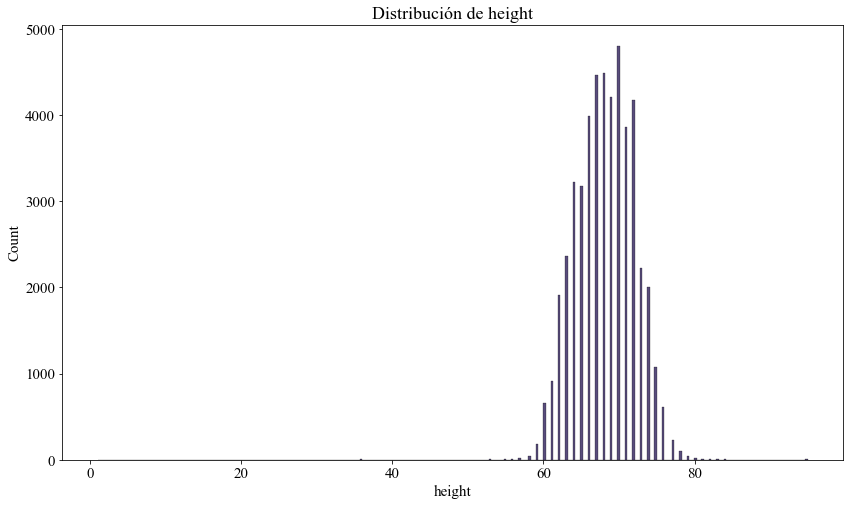

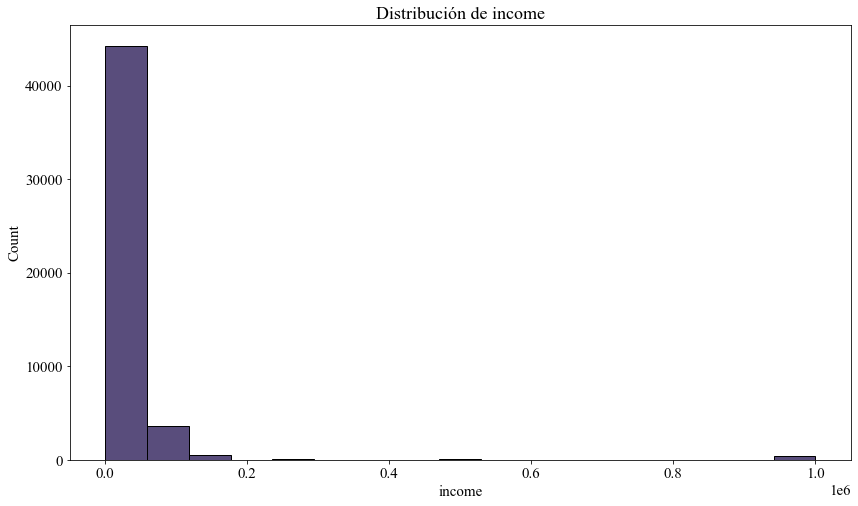

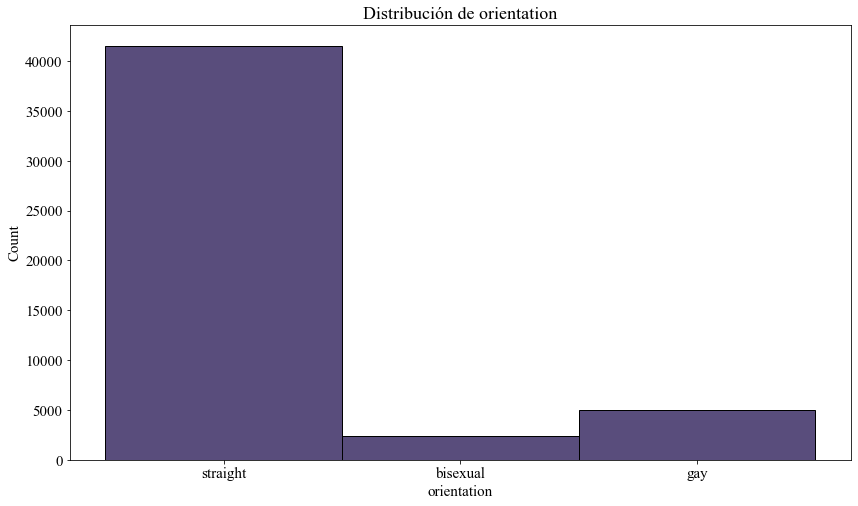

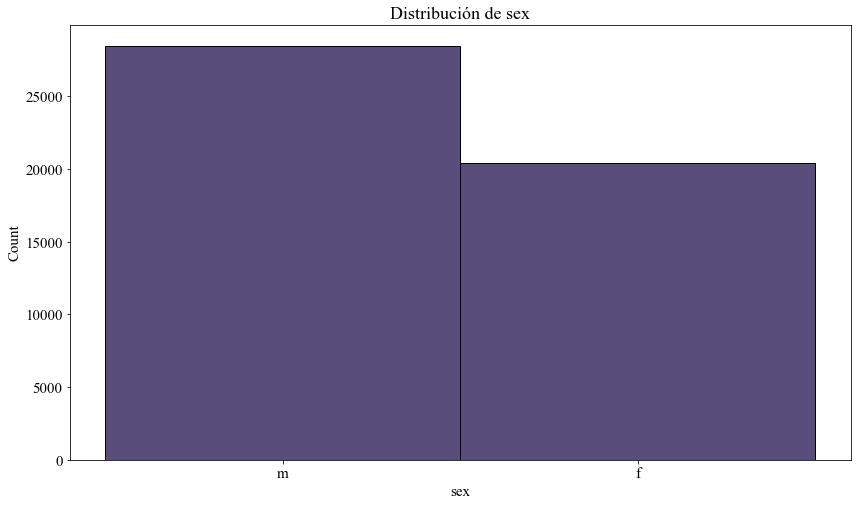

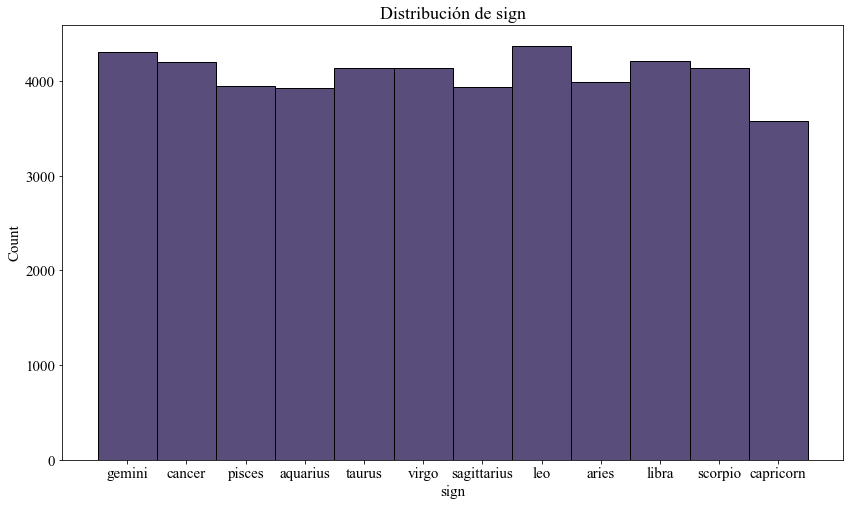

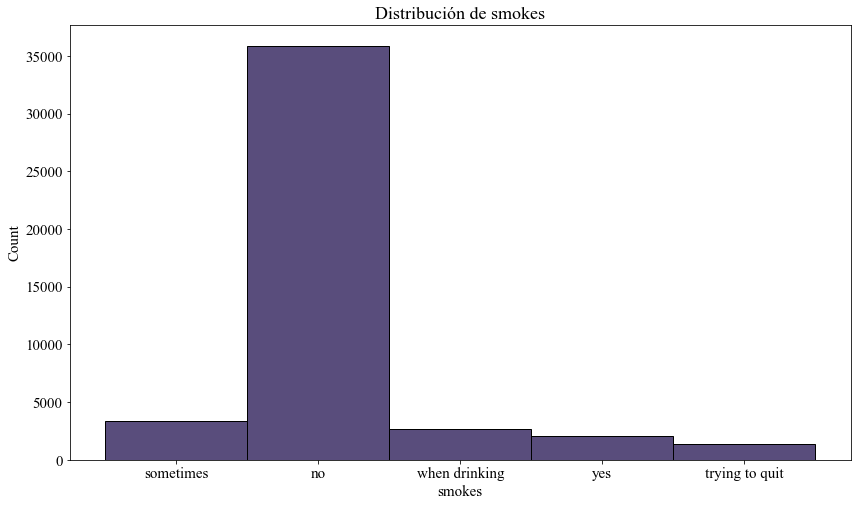

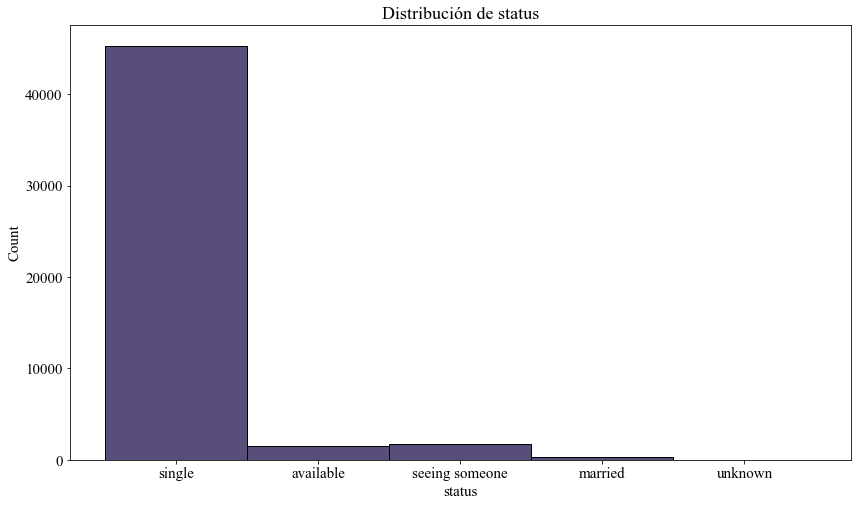

In [8]:
columnas_exp = ['age', 'body_type', 'drinks', 
                'drugs', 'height', 'income', 
                'orientation', 'sex', 'sign', 
                'smokes','status']
for feature in columnas_exp:
    plt.figure(figsize=(14,8))
    sns.histplot(datos,x=feature)
    plt.title("Distribución de "+feature)
    plt.show()
    plt.close()

### Naive Bayes Classifier

In [9]:
#crear el objeto contador:
contador_palabras = CountVectorizer()
#crear lista de palabras:
contador_palabras.fit(datos.essay)

CountVectorizer()

In [10]:
#obtención de vector de cuentas
counts = contador_palabras.transform(datos.essay)

In [11]:
#separación de los datos en entrenamiento y prueba
x_train,x_test,y_train,y_test = train_test_split(counts,datos.sign)

In [12]:
#iniciación del modelo:
predictor = MultinomialNB()
predictor.fit(x_train,y_train)

MultinomialNB()

In [13]:
predictor.score(x_test,y_test)*100

9.253047533338787

I'm pisces


Tu signo más probable es: pisces


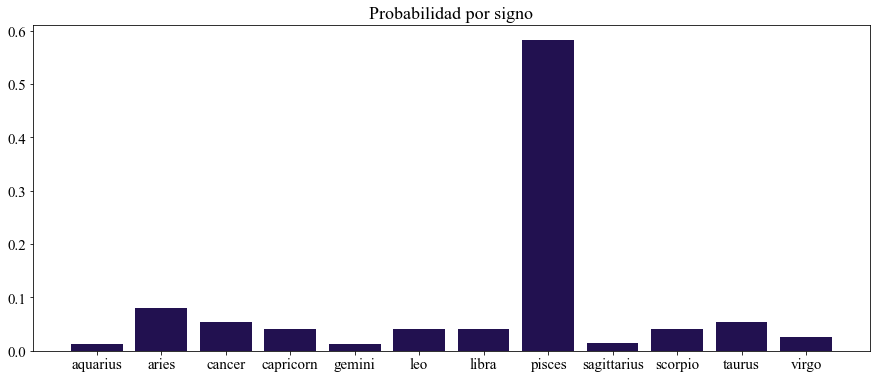

In [14]:
descripcion = [input()]
transformed_description = contador_palabras.transform(descripcion)
print("\n\nTu signo más probable es: {}".format(predictor.predict(transformed_description)[0]))
probabilidades = predictor.predict_proba(transformed_description)[0]
plt.figure(figsize=(15,6))
plt.bar(predictor.classes_,probabilidades)
plt.title("Probabilidad por signo")
plt.show()

Una vez entrenado y probado el modelo se guardará en un archivo llamado "sign_predictor.pkl" para que pueda descargarlo, entrenarlo con nuevos datos y probarlo el que lo desee.

In [24]:
import joblib
joblib.dump(predictor,"sign_predictor.pkl")

['sign_predictor.pkl']